In [1]:
from __future__ import annotations

import gymnasium as gym
from DQNAgent import DQNAgent
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lr = 1e-3
n_steps = 1000
start_epsilon = 1.0 #epsilon greedy parameter
eps_decay = start_epsilon/(n_steps/2) #Rate at which to reduce chance of random action being taken
final_eps = 0.1 #minimum epsilon greedy param
gamma = 0.95 #Discount factor
env = gym.make("ALE/Breakout-v5",render_mode="human")
action_dim = env.action_space.n
frame_count = 0

In [3]:
agent = DQNAgent(action_dim,lr,gamma, eps_decay)

In [4]:
env = gym.wrappers.AtariPreprocessing(env, frame_skip=1) #Frame preprocessing, resize frame to 84x84, following "Play Atari with DeepRL"
env = gym.wrappers.FrameStack(env,4) #Stack frames into groups of 4
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=5)
episode_reward_history = []
done = False
episode_count=0
while True:
    episode_reward = 0
    obs,info = env.reset()
    obs = np.array(obs)
    
    done = False
    for episode in range(1,n_steps):
        frame_count+=1
        action = agent.action_selection(obs,frame_count)
        next_obs, reward, terminated, truncated, info = env.step(action)
        next_obs = np.array(next_obs)
        done = terminated or truncated
        agent.remember(obs,action, reward,next_obs, done)
        
        episode_reward += reward
        obs = next_obs

        if len(agent.done_history)>agent.batch_size and frame_count%4==0:
            agent.replay()
        
        if done:
            break

    episode_reward_history.append(episode_reward)

    if len(episode_reward_history)>100:
        del episode_reward_history[:1]
    running_reward = np.mean(episode_reward_history)
    episode_count += 1
    print(running_reward)
    if running_reward > 100:
        print('Solved at episode{}'.format(episode_count))
        break
    # if episode_count >10:
    #     print('episode{}'.format(episode_count))
    #     break

1/1 [==============================] - 0s 15ms/step
1.0
1/1 [==============================] - 0s 13ms/step
1.5
1/1 [==============================] - 0s 13ms/step
1.0
1/1 [==============================] - 0s 13ms/step
1.25
1/1 [==============================] - 0s 13ms/step
1.0
1/1 [==============================] - 0s 14ms/step
0.8333333333333334
1/1 [==============================] - 0s 13ms/step
0.8571428571428571
1/1 [==============================] - 0s 14ms/step
0.75
1/1 [==============================] - 0s 14ms/step
0.7777777777777778
1/1 [==============================] - 0s 14ms/step
0.9
1/1 [==============================] - 0s 15ms/step
1.0
1/1 [==============================] - 0s 13ms/step
1.0
1/1 [==============================] - 0s 14ms/step
1.1538461538461537
1/1 [==============================] - 0s 13ms/step
1.0714285714285714
1/1 [==============================] - 0s 15ms/step
1.0666666666666667
1/1 [==============================] - 0s 13ms/step
1.125
1/1 [=====

In [1]:
print(env.length_queue)
print(env.return_queue)
print(agent.training_error)

NameError: name 'env' is not defined

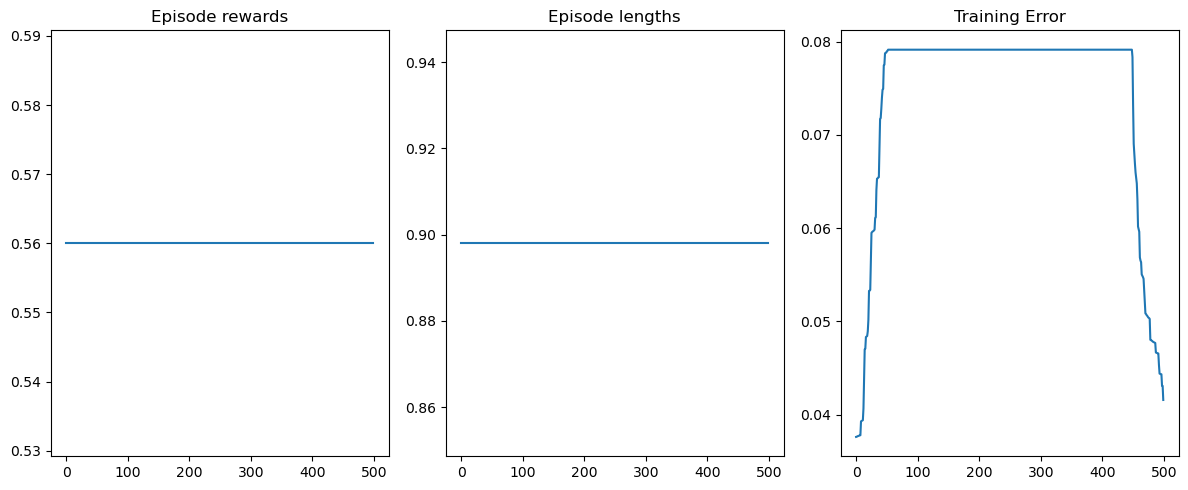

In [6]:
rolling_length = 500
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))
axs[0].set_title("Episode rewards")
# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = (
    np.convolve(
        np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
    / rolling_length
)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
axs[1].set_title("Episode lengths")
length_moving_average = (
    np.convolve(
        np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
    )
    / rolling_length
)
axs[1].plot(range(len(length_moving_average)), length_moving_average)
axs[2].set_title("Training Error")
training_error_moving_average = (
    np.convolve(np.array(agent.training_error), np.ones(rolling_length), mode="same")
    / rolling_length
)
axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)
plt.tight_layout()
plt.show()